In [1]:
pip install yfinance pandas matplotlib beautifulsoup4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 34.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 83.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 89.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 97.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests


## PREGUNTA 1

In [11]:
# Descargar datos de acciones de Tesla
tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="5y")
tesla_stock_data.reset_index(inplace=True)

# Mostrar los primeros 5 registros
tesla_stock_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-11-25 00:00:00-05:00,22.954666,22.971333,22.297333,22.422667,185092500,0.0,0.0
1,2019-11-26 00:00:00-05:00,22.351334,22.366667,21.806667,21.927999,119211000,0.0,0.0
2,2019-11-27 00:00:00-05:00,22.074667,22.261999,21.904667,22.086000,83334000,0.0,0.0
3,2019-11-29 00:00:00-05:00,22.073999,22.084000,21.833332,21.996000,36984000,0.0,0.0
4,2019-12-02 00:00:00-05:00,21.959999,22.425333,21.912666,22.324667,91117500,0.0,0.0


## PREGUNTA 2

In [26]:
# Descargar el contenido HTML de la página de ingresos
url_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url_revenue)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find_all('table')[1] 
rows = table.find_all('tr')

dates = []
revenues = []

for row in rows[1:]: 
    cols = row.find_all('td')
    if len(cols) >= 2:  
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        dates.append(date)
        revenues.append(revenue)

tesla_revenue_df = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

# Mostrar las primeras filas
tesla_revenue_df.head()


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## PREGUNTA 3

In [28]:
# Descargar datos de acciones de GameStop
gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="5y")
gamestop_stock_data.reset_index(inplace=True)

# Mostrar los primeros registros
gamestop_stock_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-11-25 00:00:00-05:00,1.4175,1.5150,1.4075,1.5075,10979600,0.0,0.0
1,2019-11-26 00:00:00-05:00,1.5075,1.5650,1.5025,1.5250,10594800,0.0,0.0
2,2019-11-27 00:00:00-05:00,1.5250,1.5975,1.5050,1.5875,12120000,0.0,0.0
3,2019-11-29 00:00:00-05:00,1.5825,1.5975,1.5600,1.5850,5476000,0.0,0.0
4,2019-12-02 00:00:00-05:00,1.5875,1.6150,1.5225,1.5425,8242400,0.0,0.0


## PREgunta 4

In [30]:
url_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url_revenue)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find_all('table')[1] 
rows = table.find_all('tr')


dates = []
revenues = []

for row in rows[1:]:  
    cols = row.find_all('td')
    if len(cols) >= 2:  
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        dates.append(date)
        revenues.append(revenue)

gamestop_revenue_df = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

# Mostrar las primeras filas del DataFrame
gamestop_revenue_df.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## Pregunta 5

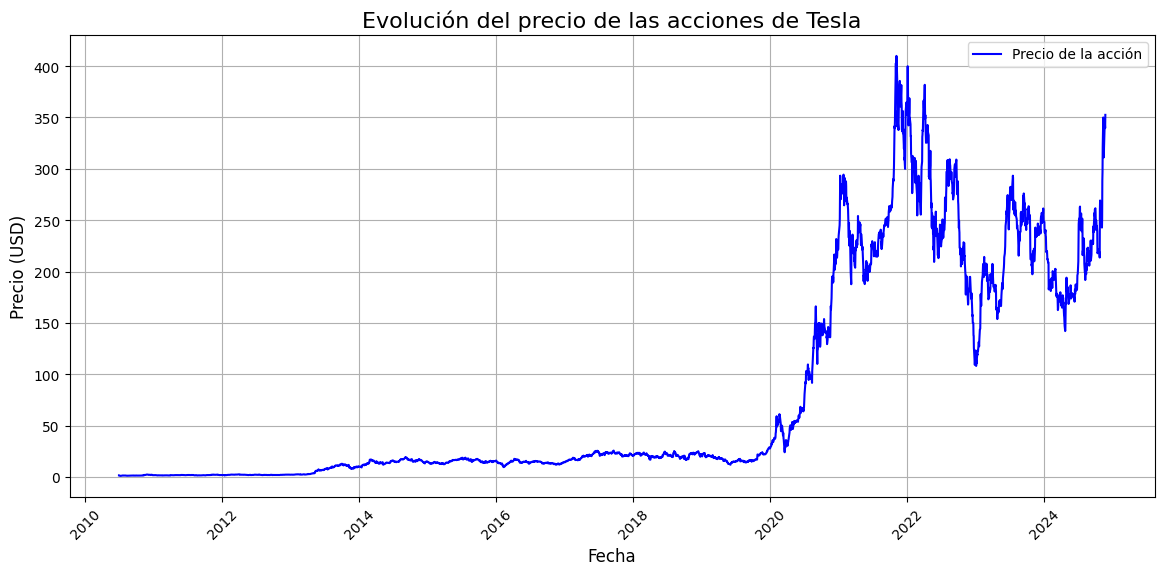

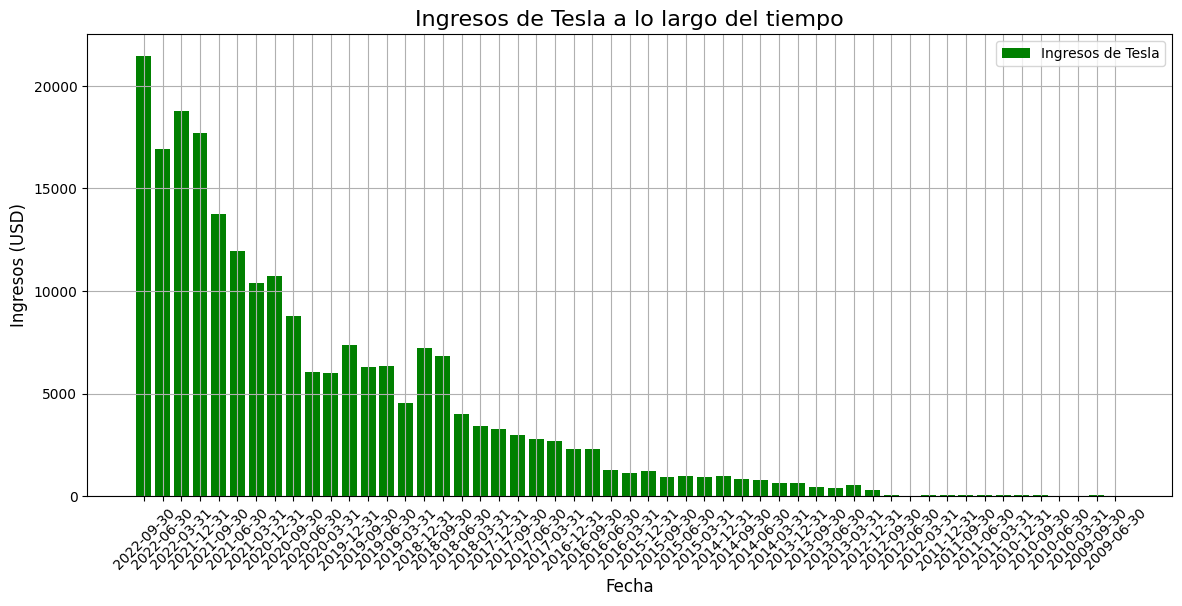

In [49]:
# --- 1. Obtener los datos históricos de Tesla ---
def obtener_datos_tesla():
    ticker_tesla = yf.Ticker("TSLA")
    datos_tesla = ticker_tesla.history(period="max")
    datos_tesla.reset_index(inplace=True)
    return datos_tesla

tesla_datos = obtener_datos_tesla()

# --- 2. Obtener los ingresos de Tesla utilizando Web Scraping ---
def obtener_ingresos_tesla(url):
    respuesta = requests.get(url)
    contenido_html = respuesta.text
    soup_html = BeautifulSoup(contenido_html, "html.parser")
    tabla_ingresos = soup_html.find_all("table")[1]
    filas = tabla_ingresos.find_all("tr")

    # Extraer y limpiar datos
    ingresos_tesla = []
    for fila in filas[1:]:
        celdas = fila.find_all("td")
        ingresos_tesla.append([celda.get_text(strip=True) for celda in celdas])

    df_ingresos = pd.DataFrame(ingresos_tesla, columns=["Fecha", "Ingresos"])
    df_ingresos = df_ingresos[df_ingresos["Ingresos"] != ""]
    df_ingresos["Ingresos"] = df_ingresos["Ingresos"].str.replace(",", "").str.replace("$", "")
    df_ingresos["Ingresos"] = pd.to_numeric(df_ingresos["Ingresos"], errors="coerce")
    df_ingresos.dropna(subset=["Ingresos"], inplace=True)
    return df_ingresos

url_ingresos = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_ingresos_df = obtener_ingresos_tesla(url_ingresos)

# --- 3. Crear gráfico de precios de las acciones de Tesla ---
def graficar_precio_accion(datos_tesla):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(datos_tesla["Date"], datos_tesla["Close"], color="blue", label="Precio de la acción")
    ax.set_title("Evolución del precio de las acciones de Tesla", fontsize=16)
    ax.set_xlabel("Fecha", fontsize=12)
    ax.set_ylabel("Precio (USD)", fontsize=12)
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.show()

graficar_precio_accion(tesla_datos)

# --- 4. Crear gráfico de los ingresos de Tesla ---
def graficar_ingresos_tesla(df_ingresos):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(df_ingresos["Fecha"], df_ingresos["Ingresos"], color="green", label="Ingresos de Tesla")
    ax.set_title("Ingresos de Tesla a lo largo del tiempo", fontsize=16)
    ax.set_xlabel("Fecha", fontsize=12)
    ax.set_ylabel("Ingresos (USD)", fontsize=12)
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.show()

graficar_ingresos_tesla(tesla_ingresos_df)

## Pregunta 6

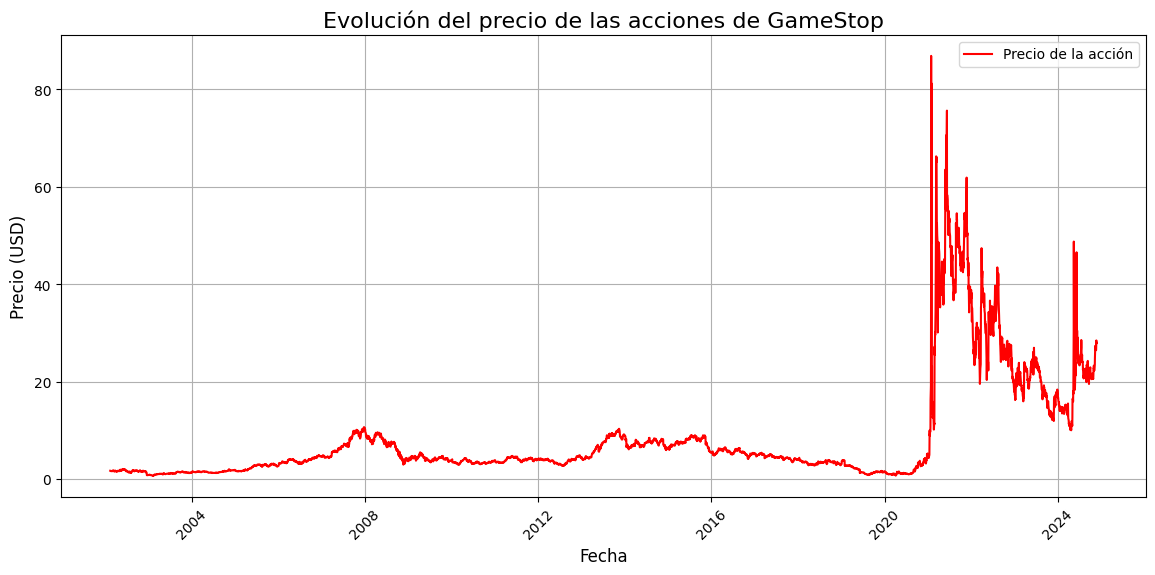

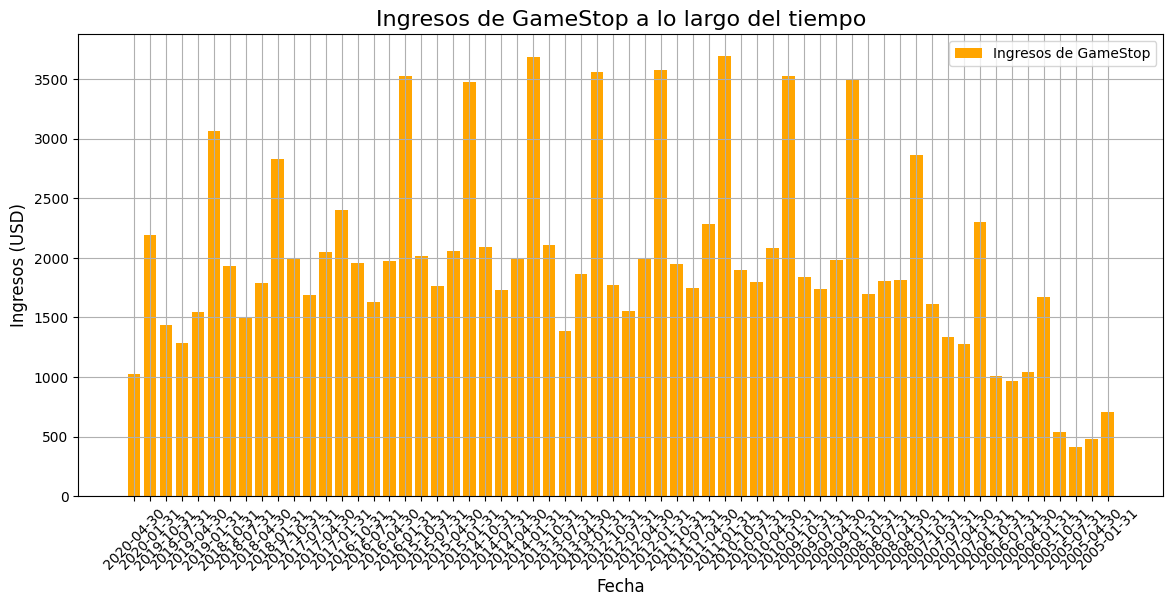

In [50]:
def obtener_datos_gamestop():
    ticker_gamestop = yf.Ticker("GME")
    datos_gamestop = ticker_gamestop.history(period="max")
    datos_gamestop.reset_index(inplace=True)
    return datos_gamestop

gamestop_datos = obtener_datos_gamestop()

def obtener_ingresos_gamestop(url):
    respuesta = requests.get(url)
    contenido_html = respuesta.text
    sopa_html = BeautifulSoup(contenido_html, "html.parser")
    tabla_ingresos = sopa_html.find_all("table")[1]
    filas = tabla_ingresos.find_all("tr")


    ingresos_gamestop = []
    for fila in filas[1:]:
        celdas = fila.find_all("td")
        ingresos_gamestop.append([celda.get_text(strip=True) for celda in celdas])

    df_ingresos = pd.DataFrame(ingresos_gamestop, columns=["Fecha", "Ingresos"])
    df_ingresos = df_ingresos[df_ingresos["Ingresos"] != ""]
    df_ingresos["Ingresos"] = df_ingresos["Ingresos"].str.replace(",", "").str.replace("$", "")
    df_ingresos["Ingresos"] = pd.to_numeric(df_ingresos["Ingresos"], errors="coerce")
    df_ingresos.dropna(subset=["Ingresos"], inplace=True)
    return df_ingresos

url_ingresos_gamestop = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gamestop_ingresos_df = obtener_ingresos_gamestop(url_ingresos_gamestop)

def graficar_precio_accion_gamestop(datos_gamestop):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(datos_gamestop["Date"], datos_gamestop["Close"], color="red", label="Precio de la acción")
    ax.set_title("Evolución del precio de las acciones de GameStop", fontsize=16)
    ax.set_xlabel("Fecha", fontsize=12)
    ax.set_ylabel("Precio (USD)", fontsize=12)
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.show()

graficar_precio_accion_gamestop(gamestop_datos)

def graficar_ingresos_gamestop(df_ingresos):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(df_ingresos["Fecha"], df_ingresos["Ingresos"], color="orange", label="Ingresos de GameStop")
    ax.set_title("Ingresos de GameStop a lo largo del tiempo", fontsize=16)
    ax.set_xlabel("Fecha", fontsize=12)
    ax.set_ylabel("Ingresos (USD)", fontsize=12)
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.show()

graficar_ingresos_gamestop(gamestop_ingresos_df)
